In [1]:
import torch
import torchvision
import fastai
print("torch:", torch.__version__)
print("torchvision:", torchvision.__version__)
print("fastai:", fastai.__version__)
print("CUDA:", torch.cuda.is_available())


torch: 1.10.2
torchvision: 0.11.3
fastai: 2.6.3
CUDA: True


In [4]:
import torch
print(torch.cuda.is_available())  # True bo'lsa, GPU ishlayotganini bildiradi
print(torch.cuda.current_device())  # Joriy GPU qurilmasining ID'sini ko'rsatadi
print(torch.cuda.get_device_name(0))  # 0-ID ga ega bo'lgan GPU nomini chiqaradi


True
0
NVIDIA GeForce RTX 3050 Laptop GPU


In [5]:
from fastai.vision.all import *
from ipywidgets import widgets

path=untar_data(URLs.PETS)/'images'

In [6]:
def is_cat(x):return x[0].isupper()

In [12]:
dls=ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, seed=42, label_func=is_cat, item_tfms=Resize(224))

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [13]:
learn=cnn_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(2)

c:\ProgramData\anaconda3\envs\fastai_env\lib\site-packages\fastai\vision\learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,0.133700,0.025419,0.992558,01:09


epoch,train_loss,valid_loss,accuracy,time
0,0.034073,0.061067,0.987821,01:51
1,0.027592,0.017319,0.995264,01:16


In [14]:
img=PILImage.create(upload.data[-1])
pred, _ ,prob=learn.predict(img)
print(pred)
print(f'{prob[1].item():.3f}')
img

AttributeError: 'FileUpload' object has no attribute 'data'

In [17]:
upload = widgets.FileUpload()
upload

FileUpload(value=(), description='Upload')

Tasnif: False
Ehtimollik: 0.000


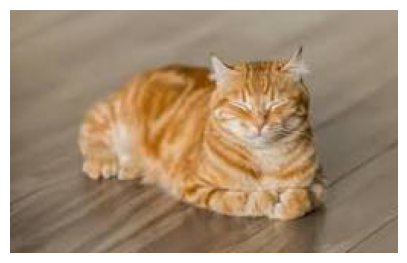

In [19]:
import io

if upload.value:
    file_info = upload.value[0]
    
    # memoryview obyektini bytesga aylantirish
    content = file_info['content']
    content_bytes = bytes(content)

    # BytesIO orqali PILImage yaratish
    img = PILImage.create(io.BytesIO(content_bytes))

    # Model yordamida bashorat qilish
    pred, _, prob = learn.predict(img)

    print(f"Tasnif: {pred}")
    print(f"Ehtimollik: {prob[1].item():.3f}")

    img.show()
else:
    print("Iltimos, rasm yuklang.")


In [7]:
path

Path('C:/Users/user/.fastai/data/oxford-iiit-pet/images')

In [13]:
ls C:/Users/user/.fastai/data/oxford-iiit-pet/images

Invalid switch - "Users".
